### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

In [ ]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv('student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


from matplotlib import pyplot as plt
_df_0['Hours'].plot(kind='hist', bins=20, title='Hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Scores'].plot(kind='hist', bins=20, title='Scores')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Hours', y='Scores', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Hours'].plot(kind='line', figsize=(8, 4), title='Hours')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Scores'].plot(kind='line', figsize=(8, 4), title='Scores')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# 1. EXPLORATORY DATA ANALYSIS (EDA)
print("="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)
print(f"Dataset Shape: {dataset.shape}")
print("\nDataset Info:")
print(dataset.info())
print("\nDescriptive Statistics:")
print(dataset.describe())
print("\nFirst 5 rows:")
print(dataset.head())

EXPLORATORY DATA ANALYSIS
Dataset Shape: (25, 2)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None

Descriptive Statistics:
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

First 5 rows:
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


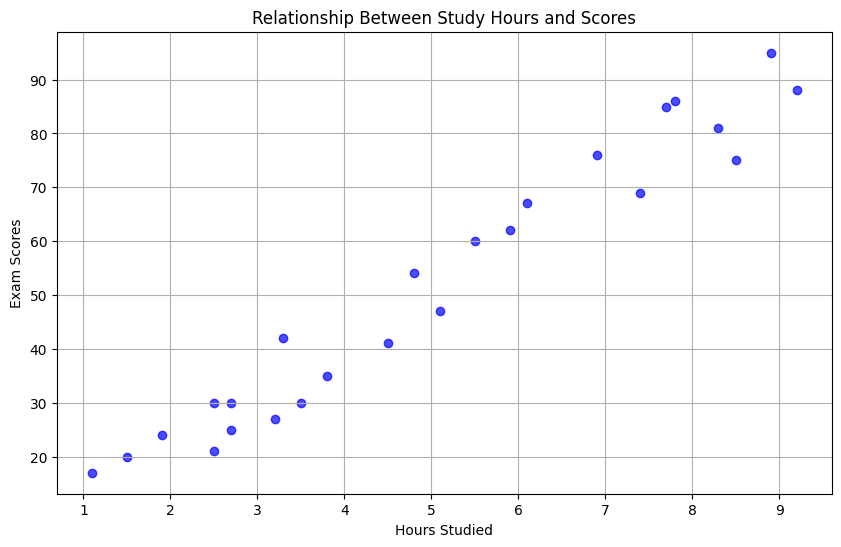

In [ ]:
# Visualisasi hubungan antara Hours dan Scores
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Hours'], dataset['Scores'], alpha=0.7, color='blue')
plt.title('Relationship Between Study Hours and Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Scores')
plt.grid(True)
plt.show()

In [ ]:
# 2. FEATURE ENGINEERING
print("FEATURE ENGINEERING")

# Check Duplicated Data
duplicates = dataset.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")

# Check Missing Values
missing_values = dataset.isnull().sum()
print(f"Missing values:\n{missing_values}")

FEATURE ENGINEERING
Number of duplicated rows: 0
Missing values:
Hours     0
Scores    0
dtype: int64


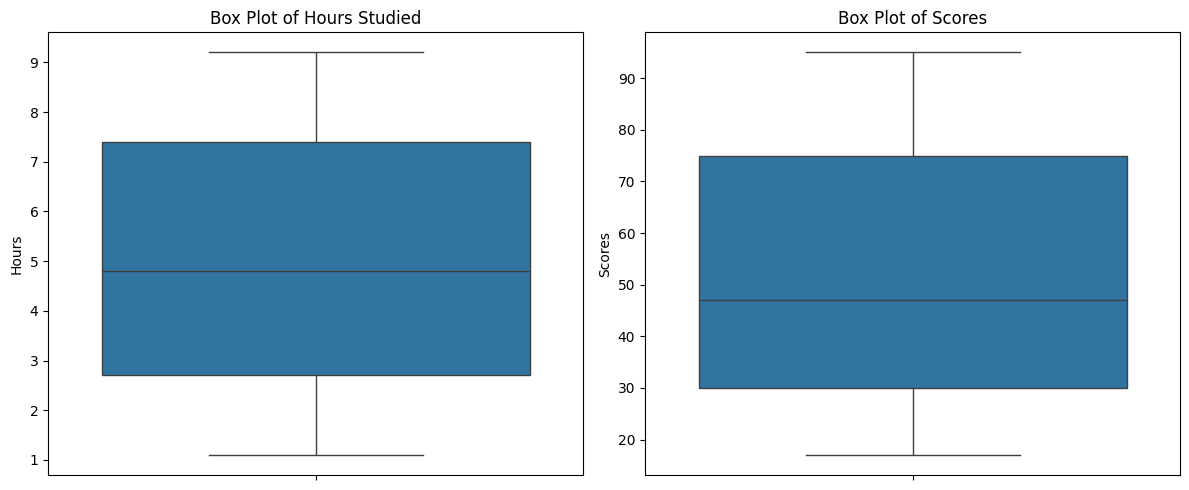

In [ ]:
# Outlier Analysis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=dataset['Hours'])
plt.title('Box Plot of Hours Studied')

plt.subplot(1, 2, 2)
sns.boxplot(y=dataset['Scores'])
plt.title('Box Plot of Scores')

plt.tight_layout()
plt.show()

In [ ]:
# 3. MODELLING
print("MODELLING")

# Memisahkan fitur dan target
X = dataset[['Hours']]
y = dataset['Scores']

# Membagi data menjadi training dan testing set (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Inisialisasi model
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=3),  # Membatasi depth karena data kecil
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=10)  # Mengurangi estimators karena data kecil
}

# Dictionary untuk menyimpan hasil evaluasi
results = {}

# Melatih dan mengevaluasi setiap model
for name, model in models.items():
    # Training model
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)

    # Evaluasi
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Menyimpan hasil
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

    print(f"\n{name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.4f}")

MODELLING
Training set size: 20
Testing set size: 5

Linear Regression Performance:
MAE: 3.92
MSE: 18.94
RMSE: 4.35
R2 Score: 0.9678

Decision Tree Performance:
MAE: 4.80
MSE: 28.70
RMSE: 5.36
R2 Score: 0.9512

Random Forest Performance:
MAE: 3.14
MSE: 14.94
RMSE: 3.87
R2 Score: 0.9746


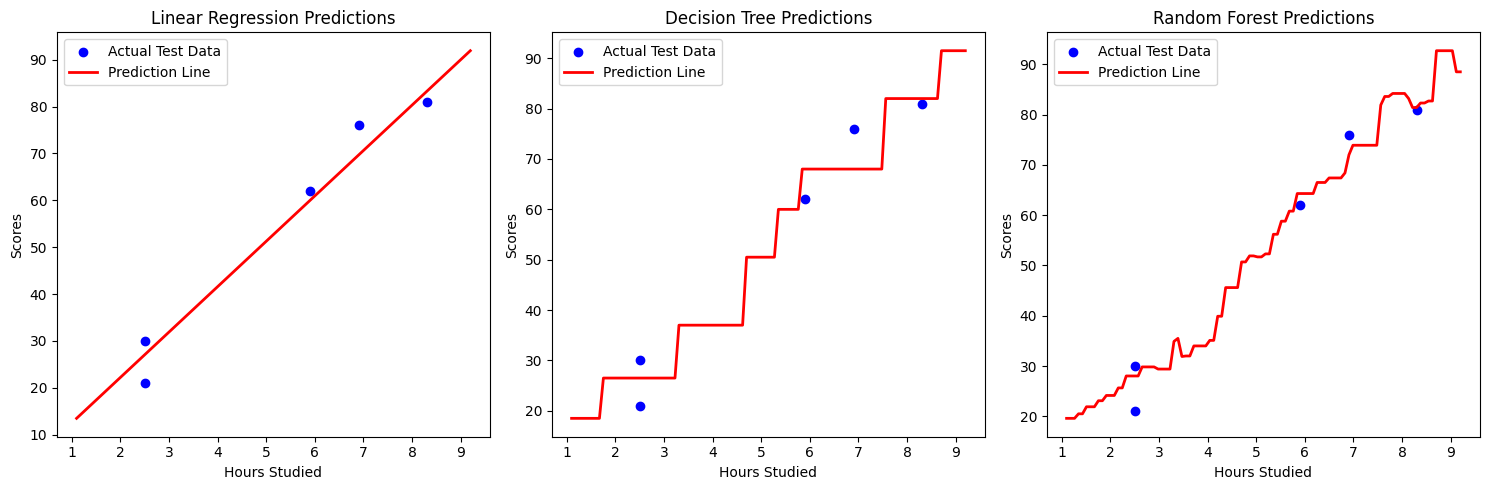

In [ ]:
# 4. VISUALISASI HASIL MODEL
plt.figure(figsize=(15, 5))

# Visualisasi prediksi vs aktual
for i, (name, model) in enumerate(models.items()):
    plt.subplot(1, 3, i+1)

    # Buat garis prediksi untuk seluruh rentang hours
    hours_range = np.linspace(dataset['Hours'].min(), dataset['Hours'].max(), 100).reshape(-1, 1)
    predicted_scores = model.predict(hours_range)

    plt.scatter(X_test, y_test, color='blue', label='Actual Test Data')
    plt.plot(hours_range, predicted_scores, color='red', linewidth=2, label='Prediction Line')
    plt.title(f'{name} Predictions')
    plt.xlabel('Hours Studied')
    plt.ylabel('Scores')
    plt.legend()

plt.tight_layout()
plt.show()

PERBANDINGAN MODEL
Perbandingan Performa Model:
                      MAE      MSE    RMSE      R2
Linear Regression  3.9208  18.9432  4.3524  0.9678
Decision Tree      4.8000  28.7000  5.3572  0.9512
Random Forest      3.1400  14.9402  3.8653  0.9746


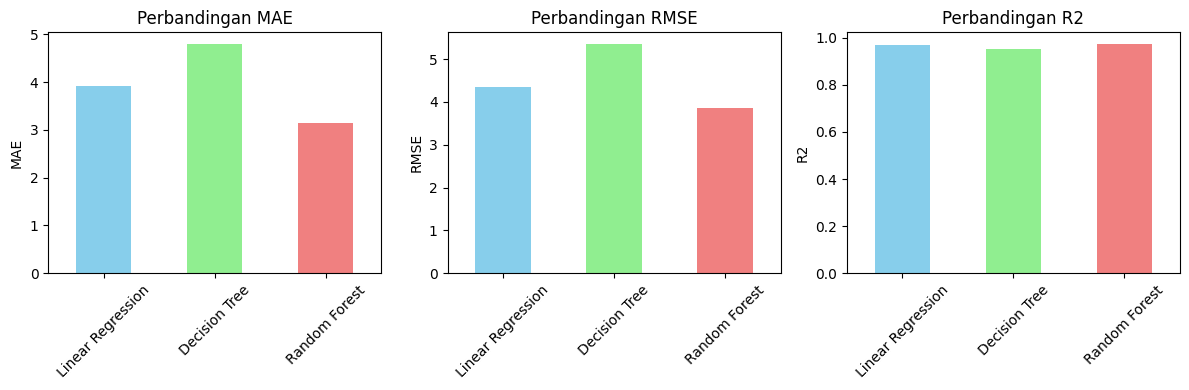

In [ ]:
# 5. PERBANDINGAN MODEL
print("="*50)
print("PERBANDINGAN MODEL")
print("="*50)

# Membuat dataframe untuk hasil evaluasi
results_df = pd.DataFrame.from_dict(results, orient='index')
print("Perbandingan Performa Model:")
print(results_df.round(4))

# Visualisasi perbandingan metrik
metrics = ['MAE', 'RMSE', 'R2']
plt.figure(figsize=(12, 4))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    results_df[metric].plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
    plt.title(f'Perbandingan {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# 6. KESIMPULAN
print("="*50)
print("KESIMPULAN")
print("="*50)

# Menentukan model terbaik berdasarkan R2 Score
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_r2 = results[best_model_name]['R2']

print(f"Model terbaik adalah: {best_model_name}")
print(f"Dengan R2 Score: {best_r2:.4f}")

# Menampilkan koefisien untuk linear regression
lr_model = models['Linear Regression']
print(f"\nLinear Regression Equation: Score = {lr_model.intercept_:.2f} + {lr_model.coef_[0]:.2f} * Hours")

# Prediksi contoh
example_hours = [[5]]
predicted_score = lr_model.predict(example_hours)
print(f"Prediksi nilai untuk {example_hours[0][0]} jam belajar: {predicted_score[0]:.2f}")

KESIMPULAN
Model terbaik adalah: Random Forest
Dengan R2 Score: 0.9746

Linear Regression Equation: Score = 2.83 + 9.68 * Hours
Prediksi nilai untuk 5 jam belajar: 51.24
